# Phân tích Hồi quy Phi tuyến tính

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành lab này bạn sẽ có thể:

-   Phân biệt giữa Hồi quy Tuyến tính và Hồi quy Phi Tuyến tính
-   Sử dụng Hồi quy Phi Tuyến tính trong Python


Nếu dữ liệu cho thấy xu hướng cong, thì hồi quy tuyến tính sẽ không tạo ra kết quả chính xác so với hồi quy phi tuyến tính bởi vì, như tên của nó, hồi quy tuyến tính cho rằng dữ liệu là tuyến tính.
Hãy cùng tìm hiểu về hồi quy phi tuyến tính và áp dụng một ví dụ trong python. Trong notebook này, chúng ta fit mô hình phi tuyến tính với các điểm dữ liệu tương ứng với GDP của Trung Quốc từ 1960-2014.


<h2 id="importing_libraries">Import các thư viện cần thiết</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Mặc dù hồi quy tuyến tính rất tốt để giải quyết nhiều bài toán nhưng nó không thể được sử dụng cho mọi tập dữ liệu. Trước tiên hãy nhớ lại cách hồi quy tuyến tính có thể mô hình hóa một tập dữ liệu. Nó mô hình hóa mối quan hệ tuyến tính giữa biến phụ thuộc y và biến độc lập x. Nó có một phương trình bậc 1 đơn giản, chẳng hạn: y = $2x$ + 3.


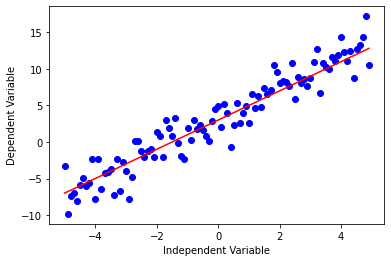

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

# Bạn có thể điều chỉnh độ dốc và hệ số chặn để xác minh những thay đổi trong biểu đồ
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Hồi quy phi tuyến tính là mối quan hệ giữa các biến độc lập $x$ và biến phụ thuộc $y$ dẫn đến dữ liệu mô hình hóa hàm phi tuyến tính. Về cơ bản, bất kỳ mối quan hệ nào không tuyến tính đều có thể được gọi là phi tuyến tính và thường được biểu diễn bằng đa thức $k$ bậc (Lũy thừa tối đa của $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Các hàm phi tuyến tính có thể có các phần tử như số mũ, logarit, phân số,.... Ví dụ: $$ y = \log(x)$$

Hoặc thậm chí, phức tạp hơn chẳng hạn như:
$$ y = \log(a x^3 + b x^2 + c x + d)$$


Hãy xem đồ thị của một hàm số bậc ba.


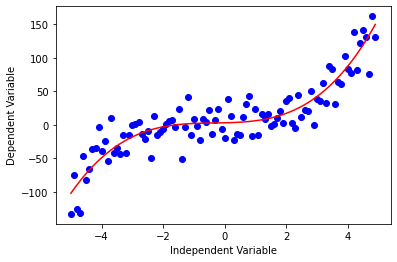

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Như bạn thấy, hàm này có các biến độc lập $x^3$ và $x^2$. Ngoài ra, đồ thị của hàm này không phải là một đường thẳng trên mặt phẳng 2D. Vì vậy, đây là một hàm phi tuyến tính.


Một số loại hàm phi tuyến tính khác:


### Bậc hai


$$ Y = X^2 $$


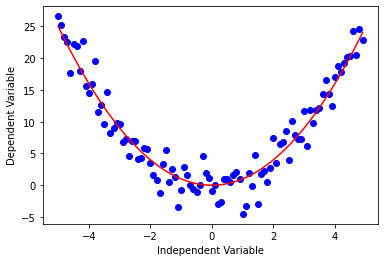

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

# Bạn có thể điều chỉnh độ dốc và hệ số chặn để xác minh những thay đổi trong biểu đồ
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Số mũ


Một hàm mũ với cơ số c được xác định theo $$ Y = a + b c^X$$ trong đó b ≠0, c > 0 , c ≠1, và x là số thực bất kỳ. Cơ số c là hằng số và số mũ x là một biến.


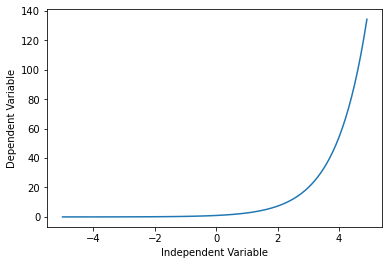

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

# Bạn có thể điều chỉnh độ dốc và hệ số chặn để xác minh những thay đổi trong biểu đồ
Y= np.exp(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Logarit

$y$ là kết quả của việc áp dụng ánh xạ logarit từ input $ x $ tới biến output $y$. Đây là một trong những dạng đơn giản nhất của **log()**: tức là $$ y = \log(x)$$

Hãy nhớ rằng thay vì $x$, có thể sử dụng $X$, có thể là biểu diễn đa thức của $x$. Ở dạng chung, nó sẽ được viết là
\begin{equation}
y = \log(X)
\end{equation}


/var/folders/jl/87v8p9cx1ddb40vd90ddy2lw0000gn/T/ipykernel_81307/3471947836.py:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


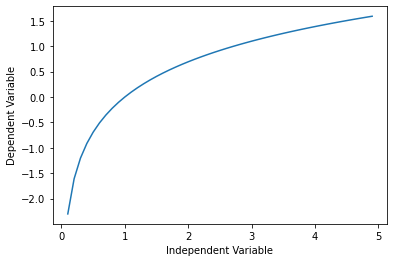

In [6]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Hàm Sigmoidal/Logistic


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


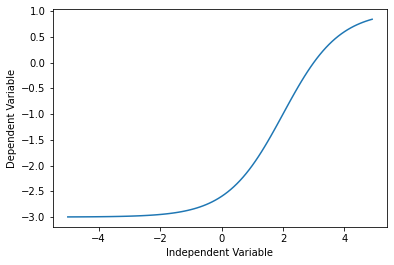

In [7]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<a id="ref2"></a>

# Ví dụ Hồi quy Phi tuyến tính


Ví dụ: chúng ta sẽ thử fit một mô hình phi tuyến tính với điểm dữ liệu tương ứng với GDP của Trung Quốc từ năm 1960 đến năm 2014. Download tập dữ liệu có 2 cột, cột đầu tiên là năm từ 1960 đến 2014, cột thứ hai là Tổng thu nhập quốc nội hàng năm tương ứng của Trung Quốc bằng đô la Mỹ cho năm đó. 


In [8]:
import numpy as np
import pandas as pd
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Vẽ đồ thị tập dữ liệu

Các điểm dữ liệu sẽ trông như thế này. Nó giống như một hàm logistic hoặc hàm mũ. Sự tăng trưởng bắt đầu chậm, sau đó từ năm 2005 trở đi, tăng trưởng đáng kể. Và cuối cùng, nó giảm tốc độ một chút trong những năm 2010.


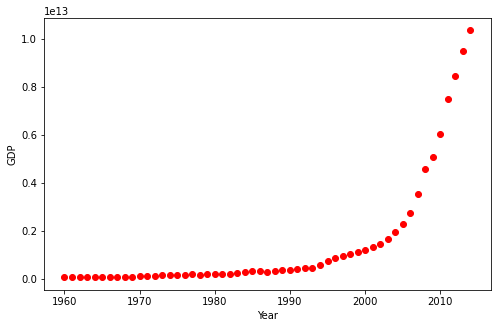

In [14]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Chọn một mô hình

Nhìn qua biểu đồ, chúng ta xác định rằng hàm logistic có thể là một phép tiệm cận tốt,
vì nó có thuộc tính bắt đầu tăng chậm, tăng lên ở giữa và sau đó lại giảm ở cuối, như minh họa dưới đây:


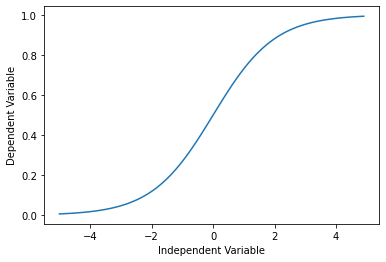

In [15]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Công thức cho hàm logistic như sau:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Kiểm soát độ dốc của đường cong,

$\beta_2$: Trượt đường cong trên trục x.


### Xây dựng mô hình

Bây giờ, hãy xây dựng mô hình hồi quy và khởi tạo các tham số của nó. 


In [16]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Hãy xem đường sigmoid mẫu có fit với dữ liệu không:


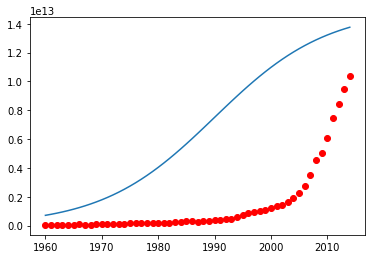

In [17]:
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

# Trực quan dự đoán ban đầu so với điểm dữ liệu
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Nhiệm vụ của chúng ta ở đây là tìm ra các thông số tốt nhất cho mô hình. Trước tiên hãy chuẩn hóa x và y:


In [18]:
# Hãy normalize dữ liệu
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

#### Làm thế nào chúng ta tìm ra các thông số tốt nhất cho fit line?

Chúng ta có thể dùng **curve_fit** sử dụng bình phương tối thiểu phi tuyến tính để fit hàm sigmoid với dữ liệu. Giá trị tối ưu cho các tham số để tổng bình phương phần dư của sigmoid (xdata,* popt) - ydata được giảm thiểu.

popt là các thông số được tối ưu hóa.


In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# In các tham số cuối cùng
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451714, beta_2 = 0.997207


Bây giờ hãy vẽ thành quả mô hình hồi quy.


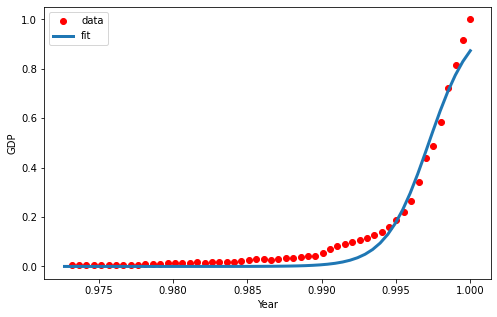

In [20]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Thực hành

Bạn có thể tính toán độ chính xác của mô hình của chúng ta là bao nhiêu không?


In [21]:
# Nhập code của bạn tại đây
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


<details><summary>Click vào đây để xem lời giải</summary>

```python
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

```

</details>


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**